# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [8]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**  
In few words, the agent is not taking any actions, it is just sitting there.  

###### Does the Smartcab move at all during the simulation?  
No it does not. It only moves to a different "initial" location whenever a new training trial is started  
###### What kind of rewards is the driving agent receiving?  
The agent is always at one intersection, it does not move(idling at the intersection). The agent gets positive rewards  oly when the traffic light is on RED color. It also seems that the reward is **not** a constant value
##### How does the light changing color affect the rewards?   
When the light changes to GREEN, then it is expected that the agent will start moving, however, because it remains idling at the intersection, it gets negative rewards (punishment).

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

 **Answer:**
#### - In the `agent.py` Python file, choose three flags that can be set and explain how they change the simulation.#
The following Flags are created:

   **   verbose @ the environment class **     = set to True to display additional output from the simulation. In this particular case, VERBOSE is set as FALSE by default(_init_), hence, it does not provide additional output to be shown (such as starting point, destination, and deadline, and comments about whether the agent has reached the destination and/or time has run out). If the value is true, the simulation will show the information above that will help to debug and understand what the agent is doing (or how).

   **   enforce_deadline @ the environment class ** = set to True to enforce a deadline metric. Thsi flag is initialized (_init_)with FALSE. When it is TRUE, it applies a penalty based on the time remaining. It basically defines in number of actions the end of the trial/testing trial.


   **  optimized @ Simmulator class ** = set to True to change the default name of the log file name. It is initialized as FALSE but when true the file name will change from "sim_default-learning.csv" to "sim_improved-learning.csv". Same occurs for the Q_table_filename.


#### - In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*

The function called is "ACT". It validates that the action can actually be performed, and if so, it performs it. It also assigns a reward to the agent after the action is performed.



#### - In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
render_texts does not return a value but prints out messages in regards to what the agent results for a given trial. It is printed in the non-gui screen of the trial, the command prompt.
The render() function basically creates/generates the GUI area of the game itself, this is, where roads, intersections and vehicles are. It does it by drawing the basic forms of the grid (i.e. rectangles, lines, etc)



####  *In the *`planner.py`* Python file, will the *`'next_waypoint()` function consider the North-South or East-West direction first?
This function checks first for headings in EAST-WEST direction in line 38

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


In [9]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

Not enough data collected to create a visualization.
At least 20 trials are required.


### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

** Panel Top Left: Relative Frequency **
This plot shows the relative frequency of the negative consequences of each  decision the agent can make. In this particular case, it is observed that while the agent does not incur in any major accident or violation it does incur in minor violations. In fact, it shows around 50% probability to make wrong decisions (all based on minor violations or idling while a green light is present). This is can be understood because of the way traffic lights are updated (red - green - red - ...) on every step of any of the trials of the simulation. 

** Panel Top Right: Average Reward **
The main observation out of this chart is that the rolling average it is basically negative with no aparent tendency to increase along the trial period; this also showed the "random" nature of the reward system the agent since the line is not steady but slightly variable. Since the agent is doing minor violations it is receiving (-5) points of rewards (punishment) which is the lowest pushment levels of any of the violations.

** Panel Bottom Left: Rate of Reliability **
This chart shows or represents the % of time the agent reached its destination on time. In this case, this metric is 0%, a clear evidence that it does *not* reach it destination in any event. This should be expected considering that the agent is not moving.

** Panel Bottom Right: Agent Rating **

SAFETY
B - Agent commits frequent minor traffic violations,such as failing to move on a green light. 
RELIABILITY
F  Agent fails to reach the destination on time for at least 60% of trips. 

Using the safety and reliability definitions for this simulation, the agent is neither Safe nor Reliable. The agent's rating aligns with the observations above, this is, the agent commits many minor violations with no accidents, and it does not reach its destination on time in most (or none) of the cases.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**  
Most important:
- **Waypoint:.** it shows the path the agent is intending to go to, hence, allows to assess the environment on that direction for safety reasons. The Waypoint also defines the efficient path defined by the Planner to reach the destination  
- **Input - Light:.** it allows the agent to identify when it is permitted to cross the intersection. It may be the most important feature to ensure a safe ride. If this is not considered as part of the state, the agent will "randomly" cross these intersections and generate accidents with other agents/cars in the environment  
- **Input - Oncoming:.** it allows the agent to identify whether it is safe to cross the intersection. The reason this feature was selected is because there are a few cases where crossing left or right in the intersection requires to know where the oncoming agent is intending to go so as to avoid accidents. Most specifically, on a green light, another agent trying to turn left (towards or through the primary agent's path).  


Other features not considered as important are:

- **Input: Left, Right.** These features are still important from a high level point of view, but if agents follow the rules of Right-of-Way it is more likely that if the primary agent has a green light, others in the same intersection will have a red light, hence, very low odds of them crossing the primary agent's path.
- **Deadline:.** This feature does not necesarily add any value to safety ratings, but Reliability will be affected by it. However, if the policy is well learned, and considering the planner and the way the "deadline" is calculated, this feature is not really needed since the agent will always reach the destination, much earlier than the "deadline".

Another common reason, Input (left and Right) and Deadline were not considered was because adding these many states would also imply a large growth of the state space which will end up slowing down the "learning" process

The underlying price paid for not learning from Inputs: left and right is that, and because we know what the rules of the environment are, the agent won't be able to recognize situations where it could turn left or right when safe to do so. To be more specific, when in a red light, the agent I build won't be able to recognize/learn when it is safe to turn since it will be basically doing a 'blind' turn which might certainly affect the safety rating of the agent, but again, it is a price paid for the tradeoff of having a manageable state space that allows a quicker "learning".

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**
I've selected *Waypoint*(which has 3 possible values) as well as *Light*(which has two possible values) and *Oncoming*(which has four possible values), this means that all possible combinations of these features would be 3x2x4 = 24. Twenty four staes would represent my State Space. Having 24 states while not a very small number, it is low enough to let the agent learn. For instance, if in each trial, we have an average deadline of (7x5=35 actions or steps), and we have a minimum of 20 trials, it'd be 20x35 = 700 opportunities to obtain a Q_Table realtively converged.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

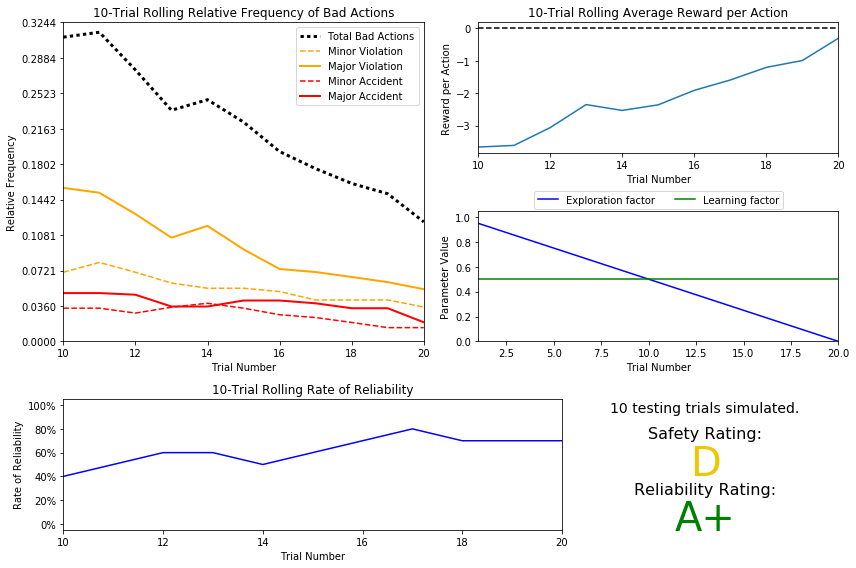

In [10]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**  
When running the default learning procedure, it can be observed that now the agent moves from a "stalled" state where it is neither acting nor learning to a position where it does start learning from the environment with each trial performed.  
The simulation requires at least 20 trials for training, and this is what it was obtained in the simulation. If it had only been used the default Epsilon-decay formula, the agent would have run 19 trials (assuming rounding, the linear decay of 0.05 reaches 0.499 at trial 19 which is the default tolerance 0.05) before starting the testing stage.  
At the parameters panel, it is expected a straight line with a negative slope for the epsilon "curve" and this is what it was obtained after the simulation was run.  


 **Panel Top Left: Relative Frequency.** In this  case, it is observed that  the agent starts making many (over 30%) Total Bad Actions, but over time this amount lowers to reach around 13-14% at the end of the training cycle which is reflected in the Safety Rating of D. Given the D rating, this means the agent did not have Major Accidents but at least one minor accident during the testing period. The highest drop was on Major   Violations of the Agent.


**Panel Top Right: Average Reward.**  The main observation out of this chart is that the rolling average steadely increase towards zero, however, it does not reach zero at the end of the training period. This means rewards become more positive overtime, hence, better decisions are being taken (following the reward structure for this scenario which provides positive rewards to non-violation actions)  


**Panel Bottom Left: Rate of Reliability ** This chart shows or represents the % of time the agent reached its destination on time which in this case started at a 40% reliability (4 out of 10 times would reach destination within the alloted timeframe) and ended at around 70%. During the testing period the agent was able to reach its destination, on time, 100% of the trials (10) given the A+ reliability obtained. 


**Panel Bottom Right: Agent Rating. **


>**SAFETY D** - As it can be seen in the SIM_DEFAULT.CSV file, this agent commited a (one) minor violation in trial 5, reason why it gets this rating and this was the only violation that occured during the testing period.


>**RELIABILITY A+:** Looking at the SIM_DEFAULT.CSV file, it is noted how the agent reached its destination 100% (10) of the trials and this result aligns with the coding in Visuals.PY

From a learning's perspective, looking at the Q-Table generated by the simulation, it is very interesting to confirm the agent "learned" the rules of the environment. In this case we had access to the environment and the rules were available to us, BUT in the real world these rules are not available, hence, need to be obtained through the iterative training process. Worth mentioning a few cases(states as defined in question 5) as examples:  

**('right', 'red', 'forward') : **

 -- forward : -5.26
 -- right : 1.20
 -- None : 0.00
 -- left : -19.83  
In this state, it can be seen how the "best" action to take is to make a right at the traffic light, or more importantly, making a left at the intersection on a red light and forward coming traffic has a really high punishment.  
**('forward', 'red', 'forward')**

 -- forward : -20.25
 -- right : 0.45
 -- None : 0.70
 -- left : -19.67
In this example the Q table demonstrates that on a red light and forward oncoming traffic the "best" option is to do nothing, or make a right at the intersection as second best option, while moving forward means the highest punishment which aligns with the expected driving rules.

Overall, it is an impressive result considering that only 20 trials were used for training the agent.



-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

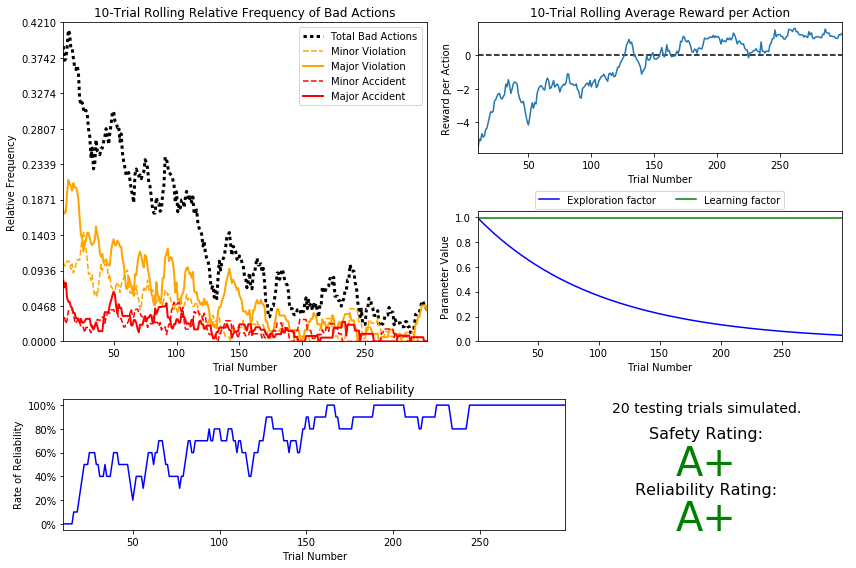

In [11]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**  
This certainly was a question that required lot of trial and error (even though I tried to systematically address it by creating an excel file where the different Epsilon functions could be compared). I also tried other states sizes (waypoint and lights) which also provided reasonable results considering they could be trained faster because of their lower number of valid states.  

I ended up using **E=a^t**. I tested and compared all functions in an Excel file to compare their behaviors under different values of alpha. This allowed me to have a sense of training cycles needed given my tolerance which stayed at 0.05 (so as to ensure the agent would actually ACT upon what it had learned in the past. I was able to compare the shape of the curves (hence, identify their differences) and define expectations for number of trials during my training periods). Specifically, I noticed that **E=a^t**  provided values very close to **E=exp(-(1-alpha)t)** for many values of alpha but they were particularly close when *alpha > 0.7*. I discarded **E=1/t^2** because it did not depended on alpha (not necessarily a bad thing, but I did prefer to have control over the shape and number of trials for training; I discarded **E=Cos(alpha.t)** because of the cyclic nature of this function (in other words, I was not willing to start exploring in large amounts after the agent had already learned from the environment).  

Initially, I had set "short" learning periods; these did not perform well during the testing stage;. Part of the my own learning exercise was to be able to identify what was the "best" alpha to use. I selected one large enough that would generate hundreds of training trials (299) so as to increase the likelyhood of an actual learning at the agent level so as to be able to increase the number of testing trials confidently and yet expect a positive result.

There was definetly improvement compared with the default simulation results, particularly on the SAFETY rating. RELIABILITY stayed at A+, therefore, it is clear that the agent has learned a policy that permits high levels of performance even under a higher number of testing trials.




### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

**1) OPTIMAL POLICY DESCRIPTION**  
From a RL point of View, the Optimal Policy is that one, unique policy that provides a maximization of the cummulative rewards of the agent in its particular environment. Our environment follows US Right-of-Way rules, this is:
1. On a green light, a left turn is permitted if there is no oncoming traffic making a right turn or coming straight through the intersection.
2. On a red light, a right turn is permitted if no oncoming traffic is approaching from your left through the intersection.  

Specifically, our environment, creates an **initial** random reward for actions taken by the agent, however, even though they are random, they do follow a logic where good actions will always take a higher reward than bad actions. Having this good/bad structure allows the agent to learn over time regardless of the lack of determinism on the reward values. Also, depending on the severity of the bad actions, rewards can be lightly punished or very highly punished (considering the initial rewards goes between -1 and 1).  
Another way to explain the optimal policy for this particular environment is as follows:
1. **Moving Forward:** RED LIGHT: Agent will get maximum rewards if it does not run the red light (with or without cars in the intersection coming from left or right)
2. **Turning Left:** Agent will get maximum rewards if it:  
>2.a. RED Light: avoids running a red light, or avoids turning when  there is oncoming traffic on the left or right side or if the oncoming traffic is turning right  
>2.b. GREEN LIGHT: avoids oncoming traffic either crossing the intersection or turning right

3. **Turning Right:** RED LIGHT: agent will get maximum rewards if it does not enter the intersection when there's oncoming traffic from the left side. If idling, it receives less rewards (2 vs 1), hence, it'd be sub-optimal
3. **Do Nothing/Idling:** aget gets maximum rewards if it idles on a red light with an intended direction other than RIGHT (otherwise instead of getting 2, it gets 1.
4. **Follow Intended Route**. Agent will obtain maximum rewards if it follows the intended route defined by the planner, otherwise its rewards will be lower (will get 1 instead 2)

From this point of view it is important to note that given the state space chosen for my simulation, I won't be able to reach to this optimal policy given that Input['Left'] or Input['Righ'] have not been considered as part of the state space, hence, being blind to situations where either the agent will fall into accidents or just plainly missing the maximum reward due to not picking the best action expected by the environment.

**2)** Looking at the Q-Table created from my improved_simulation, all states are following the optimal policy. It can be explained because of two reasons:  
1. The number of states is not large, hence, learning was "easier" or shorter and  
2. The training stage spanned up to 299 trials, therefore, given more than enough time to learn and fine-tune each of the Q values for each action on every state

**3)** For my response I'll focus on a few states that demonstrate the learning" of the policy.  
As a reminder, the state space chosen for this project is based on (in order): (Next Waypoint, Traffic Light Color the agent sesnses, direction of the oncoming traffic towards the agent).  
FIRST EXAMPLE:  

('left', 'red', None)
 -- forward : -10.43
 -- right : 0.61
 -- None : 2.23
 -- left : -9.28



This is a really good example of a well learned policy. If an agent (or car) is at a red light, and trying to turn left with no incoming cars, its best option is to wait for a green light (action None); from the Q values above it is observed how action None has the highest value (hence, best action to take) when in this situation. Moreover, it is also clear that moving forward or left under these circunstances are heavely punished.This allows supporting the SAFETY rating of the simulation.  

SECOND EXAMPLE:  
('left', 'green', 'forward')
 -- forward : 1.11
 -- right : 0.33
 -- None : -4.10
 -- left : -20.84

In this case, the agent intends to go left on a green light with traffic oncoming in the other direction. This is an interesting case because it relates to real life conditions. From the Q table it is observed that the best action to take is to move forward and the "worst" action would be to turn left; interesting as well is that in a general sense, under this state, staying still and right turns are discouraged to the agent. This also allows supporting the SAFETY rating of the simulation.  

THIRD EXAMPLE:  

('forward', 'green', None)
 -- forward : 2.08
 -- right : 0.36
 -- None : -5.86
 -- left : 0.43


This is another good example. An agent/car intending to move forward on a green light with no oncoming cars in the opposite direction. The Q table shows the best action is to move forward, while staying still is the worst possible action to take. It also accounts for allowing right and left turns since there are no oncoming cars.
 
 FOURTH EXAMPLE:  

('forward', 'red', 'forward')
 -- forward : -10.61
 -- right : 0.41
 -- None : 1.98
 -- left : -39.96


This is maybe the simplest but very important state, this is, a car intending to move forward on a red light with oncoming traffic. The q table clearly shows that the best action (max value) is to stay still (action None). Despite my state space not considering Input['Left'], the agent has been able to learn that the second best option on these cases is to turn right (although it might as well be the first, but we'd need to consider if turning right will add unncessary time to the path of the agent, hence, affecting RELIABILITY).

**4)** The Q-Table shows all states matching the Optimal Policy, however, there is the case of:  
('right', 'red', None)
 -- forward : -10.60
 -- right : -19.49
 -- None : 0.73
 -- left : -10.42

where the policy for the second best action (not really applicable for this exercise, yet worth mentioning for this question) is turning left; it is clear from US's Right-of-Way laws that this is an invalid and non accepted decision to make. I would have expected as second best decision turning right, but turning right is the worth decision to make! This can be explained because my state space did not consider Input['Left'] as one of its feature sets, hence, the inability to learn from this particular case.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**
I would say:  
>1. Environment: I'd say there's no causality connection (necessarily) between the state where the agent currently is and the future one; in other words, the agent has no way to know where it will be since that depends on the Planner.
2. SmartCab: The agent only knows about the state it is on, it does not know or have a way to know how far the destination is or the rewards it will obtain. This is also because Gamma is zero hence impeding the use of future rewards.



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.